In [4]:
import os

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import os





In [5]:
curr_dir = os.getcwd()

In [6]:
# Load data
Matrix_Data = pd.read_csv(os.path.join(curr_dir, "Model-Matrix_Update_MissingValues.csv"))

# Define features and target
X = Matrix_Data[[
    'SumPopulation',
    'SumPopulation_CompletedFromExternalData',
    'NumberOfCities_smaller35km',
    'Jewish_precent',
    'Arab_precent',
    'Jewish_Arabs_precent_CompletedFromExternalData',
    'precentPopulation_over20',
    'ClalitPrecent_fromTatal',
    'ClalitPrecent_fromTatal_CompletedFromExternalData',
    'MacabiPrecent_fromTatal',
    'MacabiPrecent_fromTatal_CompletedFromExternalData',
    'MeuhedetPrecent_fromTatal',
    'MeuhedetPrecent_fromTatal_CompletedFromExternalData',
    'LeumitPrecent_fromTatal',
    'LeumitPrecent_fromTatal_CompletedFromExternalData',
    'SocioeconomicStatusֹ',
    'SocioeconomicStatusֹ_CompletedFromExternalData',
    'periphery',
    'Jerusalem_district',
    'North_district',
    'Center_district',
    'Haifa_district',
    'TLV_district',
    'South_district'
]]
y = Matrix_Data['Clinic_hours_for_1000_people_bigger9']

# Define the number of folds for cross-validation
num_folds = 5

In [7]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3]
}

# Initialize the model (XGBoost)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with stratified cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=stratified_cv, scoring='f1', verbose=1, n_jobs=-1)



In [10]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importanc...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='f1', verbose=1)

In [11]:
# Fit the grid search to the combined training and validation set
grid_search.fit(X, y)

# Print all parameter combinations and their scores
print("All parameter combinations and their scores:")
for i in range(len(grid_search.cv_results_['params'])):
    print(f"Params: {grid_search.cv_results_['params'][i]}")
    print(f"Mean Test Score: {grid_search.cv_results_['mean_test_score'][i]}")
    print(f"Std Test Score: {grid_search.cv_results_['std_test_score'][i]}")
    print("")



Fitting 5 folds for each of 144 candidates, totalling 720 fits
All parameter combinations and their scores:
Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Mean Test Score: 0.0
Std Test Score: 0.0

Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
Mean Test Score: 0.0
Std Test Score: 0.0

Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Mean Test Score: 0.0
Std Test Score: 0.0

Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Mean Test Score: 0.15555555555555553
Std Test Score: 0.19372884193514103

Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Mean Test Score: 

In [12]:
# Extract and print the best parameters
best_params = grid_search.best_params_
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param} = {value}")
# Extract and print the best score
best_score = grid_search.best_score_
print(f"\nBest ROC AUC Score: {best_score}")

# Get the best model from grid search
best_model = grid_search.best_estimator_


Best Parameters:
colsample_bytree = 0.8
learning_rate = 0.1
max_depth = 5
min_child_weight = 1
n_estimators = 100
subsample = 0.8

Best ROC AUC Score: 0.3475990675990676


In [13]:
import datetime
import pickle

now = datetime.datetime.now()
dt_string = now.strftime("%d%m%Y_%H%M%S")
model_path = os.path.join(curr_dir, f"best_model_{dt_string}")

with open(model_path, "wb") as fp:
    pickle.dump(best_model, fp)
print(f"Model saved in {model_path}")

Model saved in C:\Users\User\Documents\Ruppin\med_services_israel\best_model_28062024_100736


In [14]:
preds = best_model.predict(X)

In [15]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score
# Calculate metrics based on the aggregated validation predictions
accuracy = accuracy_score(y, preds)
roc_auc = roc_auc_score(y, preds)
cm = confusion_matrix(y, preds)
precision = precision_score(y, preds)
recall = recall_score(y, preds)

print("\nValidation Set Evaluation:")
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)


Validation Set Evaluation:
Accuracy: 1.0
ROC-AUC Score: 1.0
Confusion Matrix:
 [[216   0]
 [  0  37]]
Precision: 1.0
Recall: 1.0


In [6]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [17]:
import shap

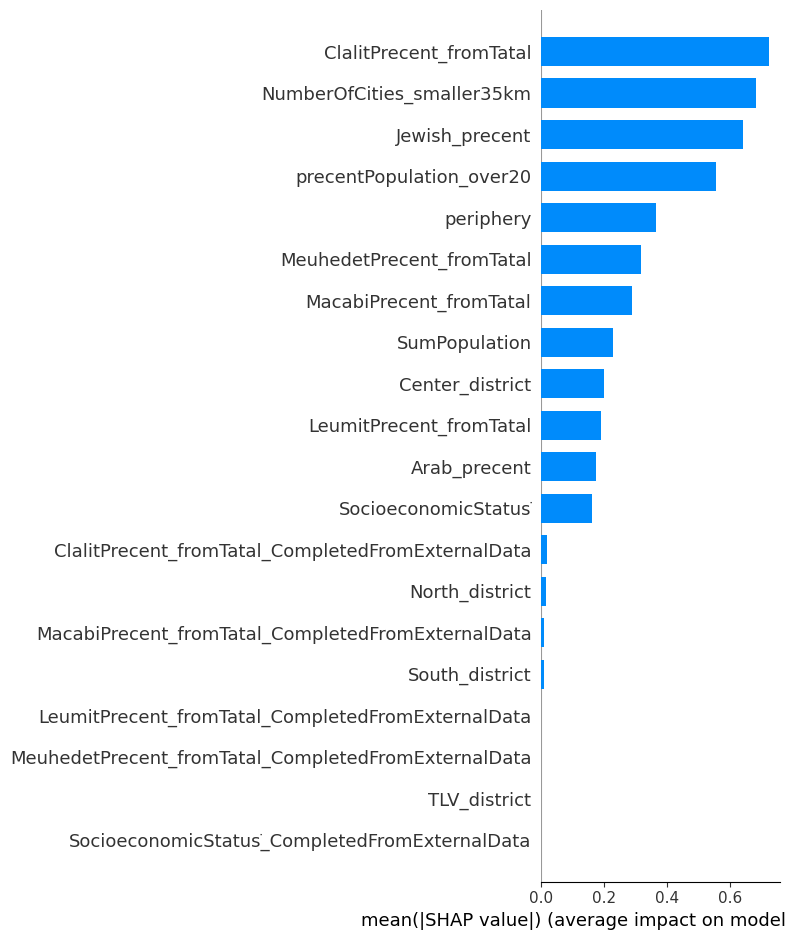

In [18]:
# SHAP explanations
# compute SHAP values
explainer = shap.Explainer(best_model, X)
shap_values = explainer(X)


# Plot the SHAP values, showing all features
shap.summary_plot(shap_values, X, plot_type="bar")

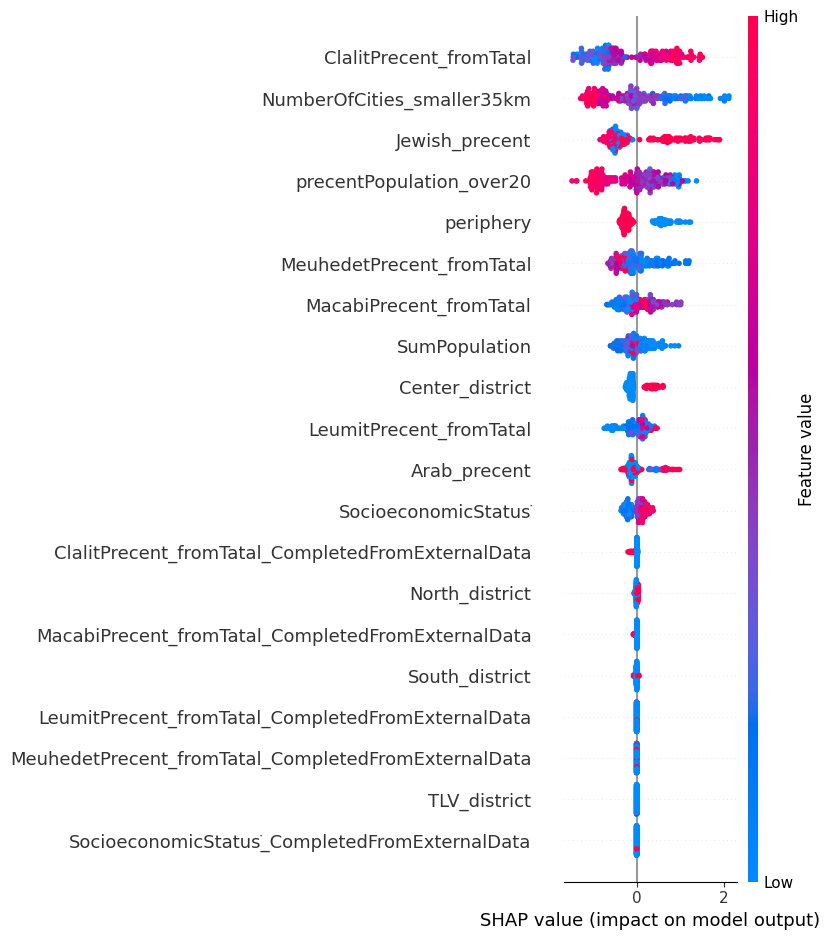

In [19]:
import shap
import matplotlib.pyplot as plt

# Compute SHAP values
explainer = shap.Explainer(best_model, X)
shap_values = explainer(X)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X, plot_type="dot", show=False)


plt.show()


In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, make_scorer
import numpy as np

# Define your parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the model
model = xgb.XGBClassifier()

# Define the scoring metric
scorer = make_scorer(f1_score, average='weighted')  # Adjust 'average' based on your dataset

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the model
grid_search.fit(X, y)

# Get the best model
best_model2 = grid_search.best_estimator_

# Evaluate the best model with cross-validation
cv_results = cross_val_score(best_model2, X, y, cv=5, scoring=scorer)

print(f"Cross-validated F1 score: {np.mean(cv_results)}")
print(f"Best model F1 score on training data: {f1_score(y, best_model2.predict(X), average='weighted')}")


Cross-validated F1 score: 0.8462168607181395
Best model F1 score on training data: 1.0


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define your parameter grid
param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])

# Define the scoring metric
scorer = make_scorer(f1_score, average='weighted')

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the model
grid_search.fit(X, y)

# Get the best model
best_model3 = grid_search.best_estimator_

# Evaluate the best model with cross-validation
cv_results = cross_val_score(best_model3, X, y, cv=5, scoring=scorer)

print(f"Cross-validated F1 score: {np.mean(cv_results)}")
print(f"Best model F1 score on training data: {f1_score(y, best_model3.predict(X), average='weighted')}")


Cross-validated F1 score: 0.8462168607181395
Best model F1 score on training data: 1.0


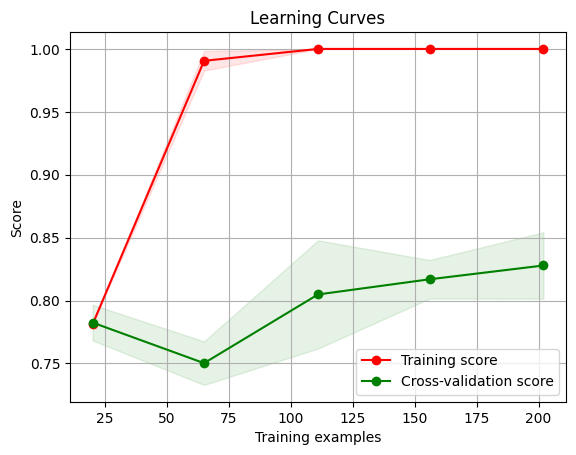

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring=scorer)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot test scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


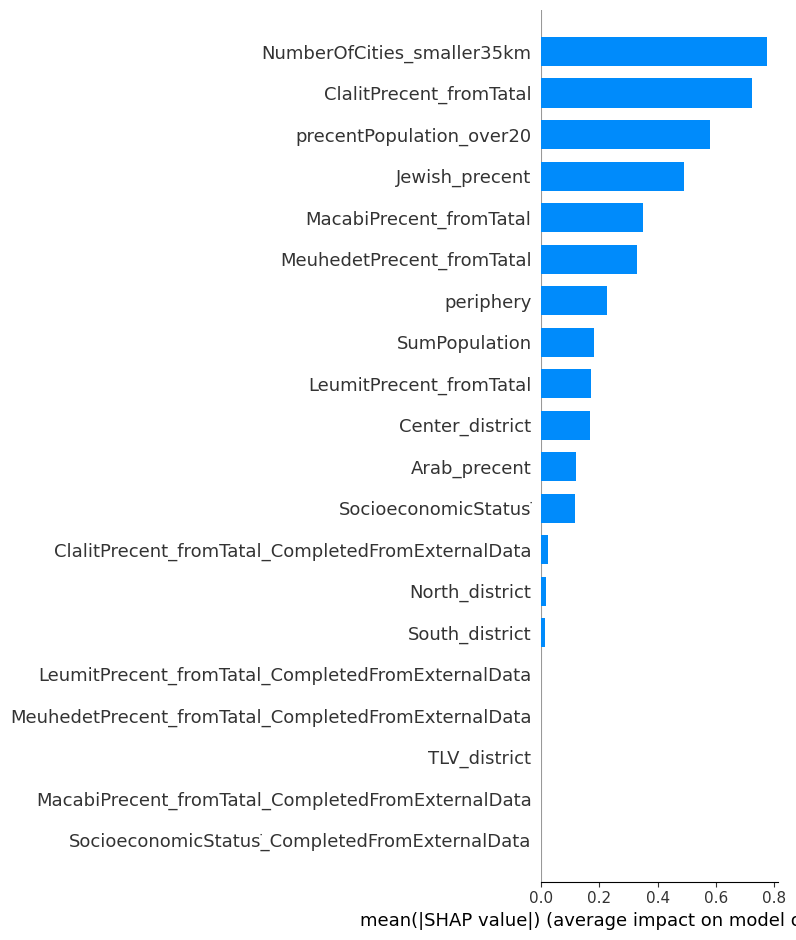

In [24]:
# SHAP explanations
# compute SHAP values
explainer2 = shap.Explainer(best_model2, X)
shap_values2 = explainer2(X)


# Plot the SHAP values, showing all features
shap.summary_plot(shap_values2, X, plot_type="bar")

In [29]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb
import numpy as np

# Define your parameter grid
param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBClassifier())
])

# Define the scoring metric
scorer = make_scorer(f1_score, average='weighted')

# Set up the stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the grid search with stratified cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=stratified_cv)

# Fit the model
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model with cross-validation
cv_results = cross_val_score(best_model, X, y, cv=stratified_cv, scoring=scorer)

print(f"Stratified Cross-validated F1 score: {np.mean(cv_results)}")
print(f"Best model F1 score on training data: {f1_score(y, best_model.predict(X), average='weighted')}")


Stratified Cross-validated F1 score: 0.8307287773199347
Best model F1 score on training data: 0.9486200467967649


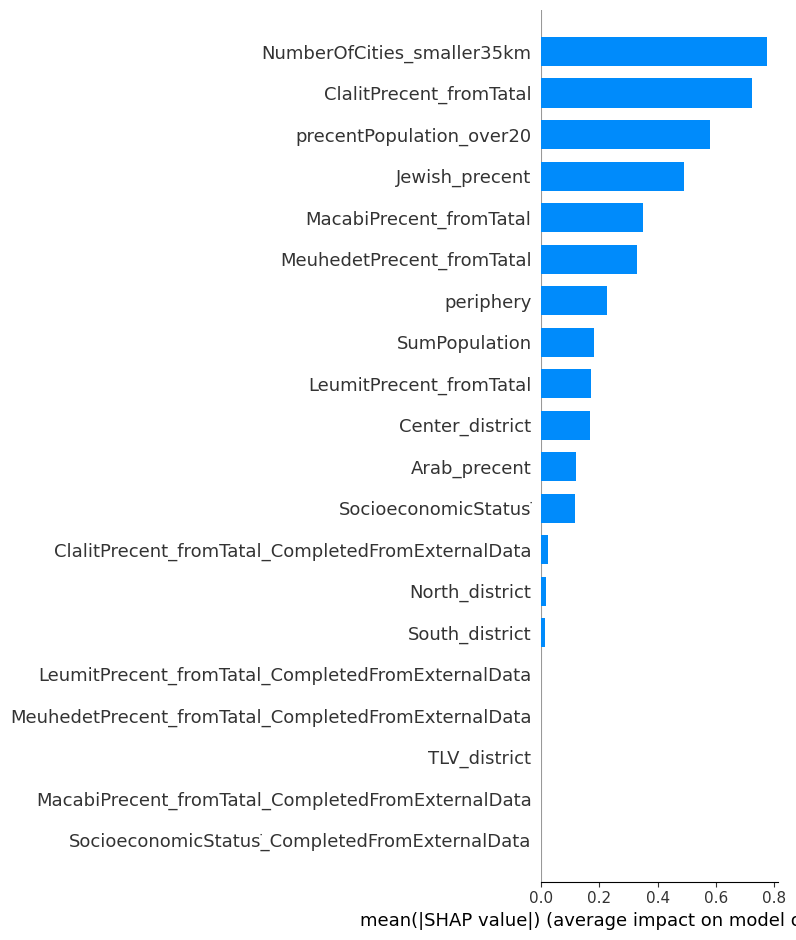

In [26]:
# SHAP explanations
# compute SHAP values
explainer2 = shap.Explainer(best_model2, X)
shap_values2 = explainer2(X)


# Plot the SHAP values, showing all features
shap.summary_plot(shap_values2, X, plot_type="bar")

In [31]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb
import numpy as np

# Define your parameter grid
param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBClassifier())
])


# Define the scoring metric
scorer = make_scorer(f1_score, average='weighted')

# Set up the stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the grid search with stratified cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=stratified_cv)



In [ ]:



# Fit the model
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model with cross-validation
cv_results = cross_val_score(best_model, X, y, cv=stratified_cv, scoring=scorer)

print(f"Stratified Cross-validated F1 score: {np.mean(cv_results)}")
print(f"Best model F1 score on training data: {f1_score(y, best_model.predict(X), average='weighted')}")